# Ford GoBike System Data
## by Lina Montrimaite

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
from math import sin, cos, sqrt, atan2, radians
glob.glob('/pycharm/*') 

%matplotlib inline

In [3]:
ford_gobike = pd.read_csv('fordgo_final.csv')

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data.

### Bivariate Exploration of TIME and CUSTOMER variables

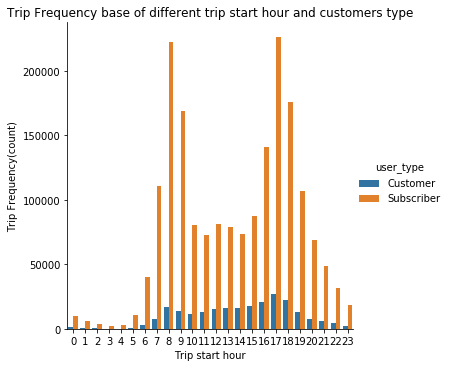

In [43]:
sb.catplot(data = ford_gobike, x = 'start_hour', hue = 'user_type', kind = 'count')
plt.xlabel('Trip start hour')
plt.ylabel('Trip Frequency(count)')
plt.title('Trip Frequency base of different trip start hour and customers type')
plt.show();

 > The frequency of bike trips based on customer type during the hours shows that subscribers use bikes mostly before working hours and after, but customers use bike rides during the day.

Next up, trip frequency base of different trip start weekday and customers type.

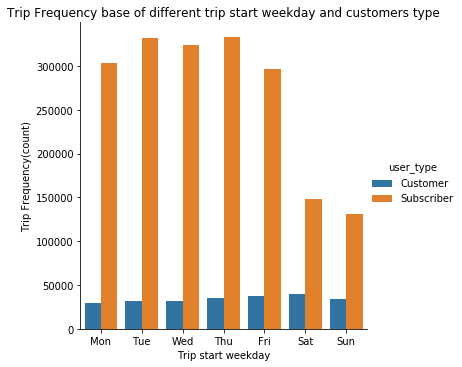

In [44]:
order_d = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.catplot(data = ford_gobike, x = 'start_weekday', hue = 'user_type', kind = 'count', order = order_d)
plt.xlabel('Trip start weekday')
plt.ylabel('Trip Frequency(count)')
plt.title('Trip Frequency base of different trip start weekday and customers type')
plt.show();

> Based on the above plot we see that customers are usually tourists using bikes consistently during the week, but subscribers are usually locals using bikes more on weekdays and less on weekends. 
 
Next up, trip frequency base of different trip start month and customers type.

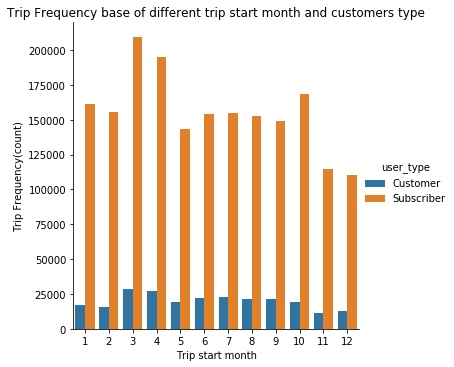

In [45]:
sb.catplot(data = ford_gobike, x = 'start_month', hue = 'user_type', kind = 'count')
plt.xlabel('Trip start month')
plt.ylabel('Trip Frequency(count)')
plt.title('Trip Frequency base of different trip start month and customers type')
plt.show();

>This plot suggests that customers and subscribers use bikes similar during the year. The most popular months are March, April and October and less popular November and December.
 
Next below, bivariate exploration between customer type and gender variables.

### Bivariate Exploration between CUSTOMER variables

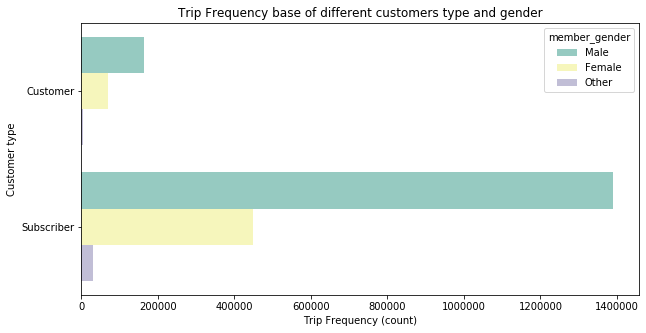

In [46]:
plt.figure(figsize=[10, 5])

sb.countplot(data = ford_gobike, y = 'user_type', hue = 'member_gender', palette="Set3")
plt.title('Trip Frequency base of different customers type and gender')
plt.xlabel('Trip Frequency (count)')
plt.ylabel('Customer type')
plt.show();

>The plot above shows that the gender gap between customers is smaller than by subscribers. Which means that women are using bikes more as a tourist, but not for travel to work. 

Next up, trip Frequency base of different user age and gender.

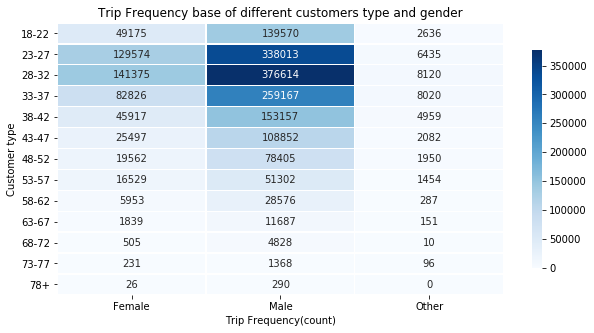

In [47]:
binsize = 5

ct_counts = ford_gobike.groupby(['age_range', 'member_gender']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'age_range', columns = 'member_gender', values = 'count')

plt.figure(figsize=[10, 5])
sb.heatmap(ct_counts, annot = True, fmt = '.0f', cmap="Blues", cbar_kws={"shrink": .8}, linewidth=0.3)
plt.title('Trip Frequency base of different customers type and gender')
plt.xlabel('Trip Frequency(count)')
plt.ylabel('Customer type')
plt.show();

> This heatmap plot shows that the most of the customers are Male and between 28 and 32 years old.

Next up, bivariate exploration of customer and travel variables.

### Bivariate Exploration of USER and TRAVEL variables

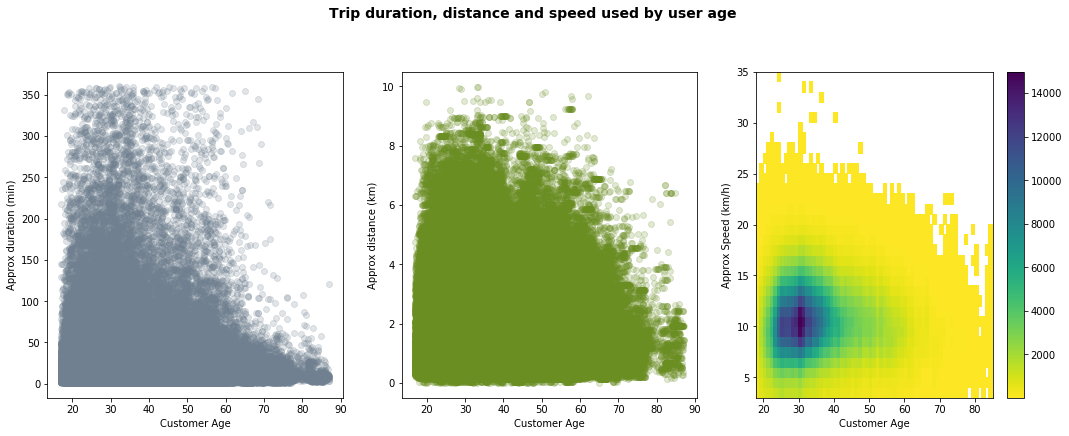

In [48]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 3, 1)
sb.regplot(data = ford_gobike[ford_gobike['duration_min']<360], x = 'user_age', y = 'duration_min', color = 'slategrey', x_jitter=1, scatter_kws={'alpha':1/5}, fit_reg=False)
plt.xlabel('Customer Age')
plt.ylabel('Approx duration (min)');

# PLOT ON CENTER
plt.subplot(1, 3, 2)
sb.regplot(data = ford_gobike[ford_gobike['distance']<10], x = 'user_age', y = 'distance', color = 'olivedrab', x_jitter=1, scatter_kws={'alpha':1/5}, fit_reg=False)
plt.xlabel('Customer Age')
plt.ylabel('Approx distance (km)');

# PLOT ON RIGHT
plt.subplot(1, 3, 3)

bins_x = np.arange(18, 85+1, 1)
bins_y = np.arange(3, 35+1, 1)

plt.hist2d(data = ford_gobike[ford_gobike['speed km/h']<35], x = 'user_age', y = 'speed km/h', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Customer Age')
plt.ylabel('Approx Speed (km/h)')
plt.suptitle('Trip duration, distance and speed used by user age', y=1.03, fontsize=14, fontweight='semibold');

>These three plots show trips count by customer age and travel duration, distance and speed.It shows that younger users are those who take a longer bike trip, have longer distance and have a higher speed of the trip.

Next I will compare trip duration, distance and speed used by customer type.

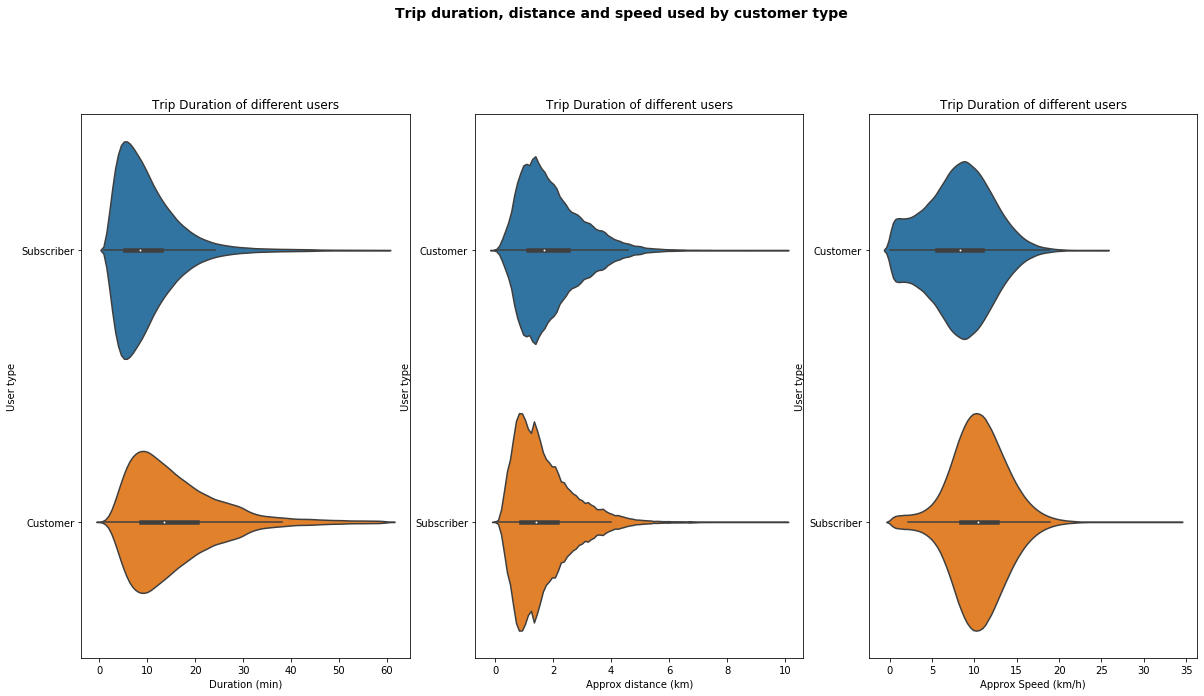

In [49]:
plt.figure(figsize = [20, 10])

# PLOT ON LEFT
plt.subplot(1, 3, 1)
sb.violinplot(data=ford_gobike[ford_gobike['duration_min']<60], y='user_type', x='duration_min', innner=None)
plt.title('Trip Duration of different users')
plt.xlabel('Duration (min)')
plt.ylabel('User type')

# PLOT ON CENTER
plt.subplot(1, 3, 2)
sb.violinplot(data=ford_gobike[ford_gobike['distance']<10], y='user_type', x='distance', innner=None)
plt.title('Trip Duration of different users')
plt.xlabel('Approx distance (km)')
plt.ylabel('User type')

# PLOT ON RIGHT
plt.subplot(1, 3, 3)
sb.violinplot(data=ford_gobike[ford_gobike['speed km/h']<35], y='user_type', x='speed km/h', innner=None)
plt.title('Trip Duration of different users')
plt.xlabel('Approx Speed (km/h)')
plt.ylabel('User type')

plt.suptitle('Trip duration, distance and speed used by customer type', y=1.03, fontsize=14, fontweight='semibold');

>These three plots show trips count by customer type and travel duration, distance and speed. It shows that customers are more likely to use bikes longer and have the highest speed. Although the subscribers use bikes for a shorter time and have lower speed.

Next up, trip duration, distance and speed used by customer gender.

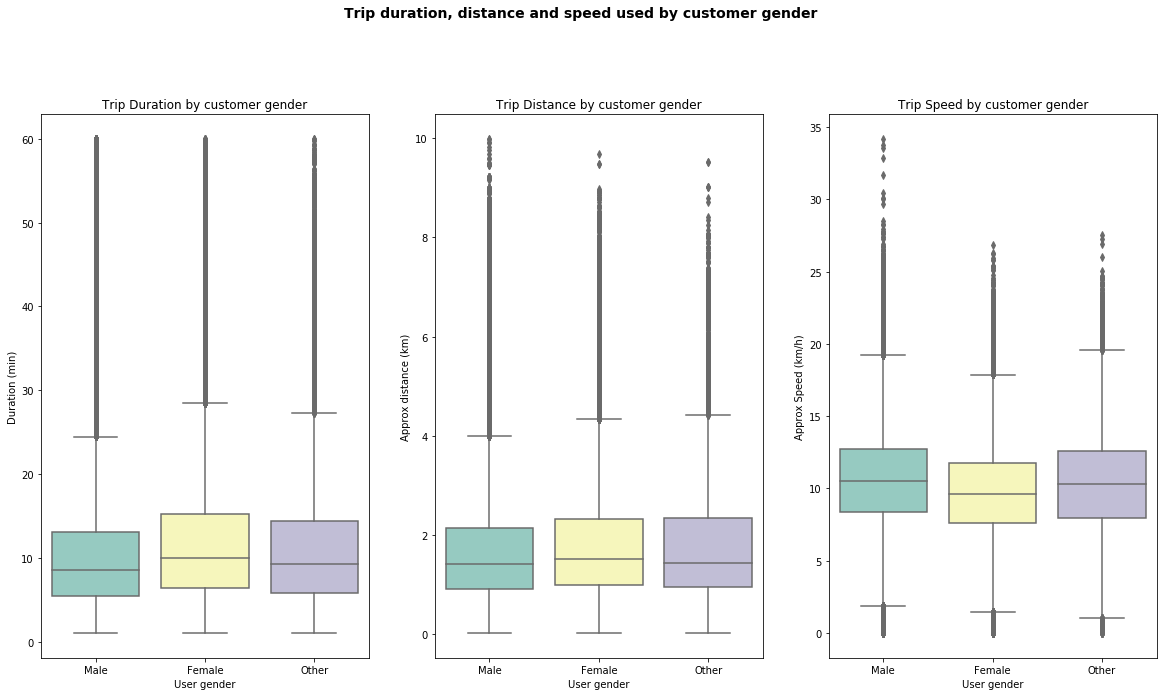

In [50]:
plt.figure(figsize = [20, 10])

# PLOT ON LEFT
plt.subplot(1, 3, 1)
sb.boxplot(data=ford_gobike[ford_gobike['duration_min']<60], x='member_gender', y='duration_min', palette="Set3" )
plt.title('Trip Duration by customer gender')
plt.ylabel('Duration (min)')
plt.xlabel('User gender')

# PLOT ON CENTER
plt.subplot(1, 3, 2)
sb.boxplot(data=ford_gobike[ford_gobike['distance']<10], x='member_gender', y='distance', palette="Set3")
plt.title('Trip Distance by customer gender')
plt.ylabel('Approx distance (km)')
plt.xlabel('User gender')

# PLOT ON RIGHT
plt.subplot(1, 3, 3)
sb.boxplot(data=ford_gobike[ford_gobike['speed km/h']<35], x='member_gender', y='speed km/h', palette="Set3")
plt.title('Trip Speed by customer gender')
plt.ylabel('Approx Speed (km/h)')
plt.xlabel('User gender')

plt.suptitle('Trip duration, distance and speed used by customer gender', y=1.03, fontsize=14, fontweight='semibold');

>These three plots show trips count by customer gender and travel duration, distance and speed. It shows that females are more likely to use bikes with longer trip duration and have the lowest speed. Although the male user uses bikes for the  shorter trip duration and has the highest  speed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The subscribers use bikes mostly before working hours and after, but customers use bike rides during the day.
- The customers are usually tourists using bikes consistently during the week, but subscribers are usually locals using bikes more on weekdays and less on weekends.
- The customers and subscribers use bikes similar during the year. The most popular months are March, April and October and less popular November and December.
- Younger users are those who take a longer bike trip, have longer distance and have a higher speed of the trip.
- The customers are more likely to use bikes longer and have the highest speed. Although the subscribers use bikes for a shorter time and have lower speed.
- Female users are more likely to use bikes with longer trip duration and have the lowest speed. The male user uses bikes for the shorter trip duration and has the highest speed.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The plot trip frequency base of different customers type and gender shows that the gender gap between customers is smaller than by subscribers. Which means that women are using bikes more as a tourist, but not for travel to work. Also females are more likely to use bikes with longer trip duration.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even further.

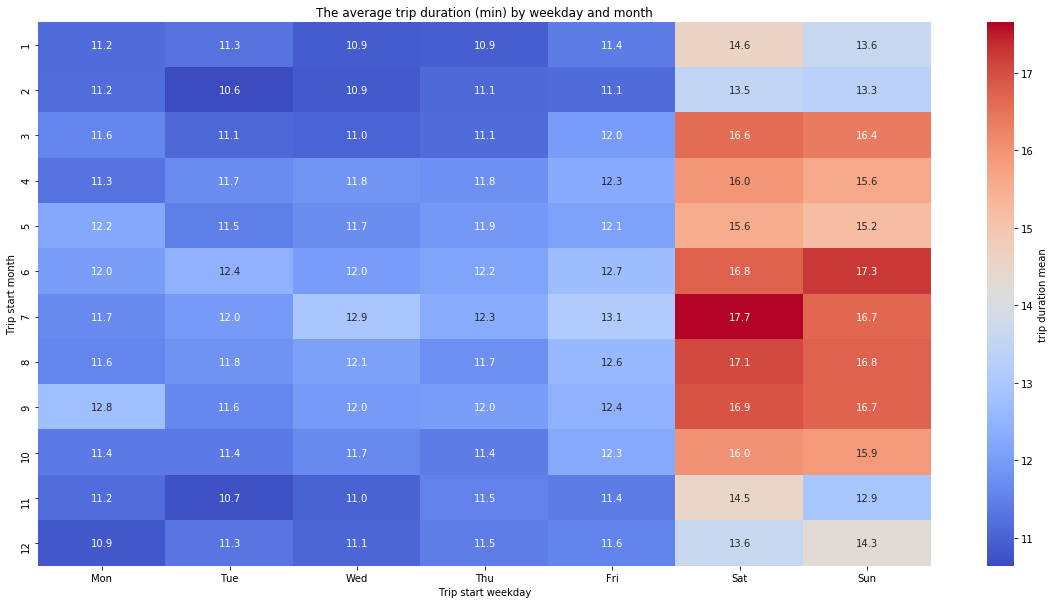

In [51]:
df_new2 = pd.DataFrame(ford_gobike.groupby(['start_weekday', 'start_month']).mean()['duration_min'])
df_new2 = df_new2.reset_index()
df_new2.start_weekday = pd.Categorical(df_new2.start_weekday, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

pivot = df_new2.pivot_table(values='duration_min',index='start_month', columns='start_weekday')
plt.figure(figsize=(20,10))
sb.heatmap(pivot, annot=True, fmt='.1f', cbar_kws = {'label' : 'trip duration mean'}, cmap='coolwarm')
plt.xlabel('Trip start weekday')
plt.ylabel('Trip start month')
plt.title('The average trip duration (min) by weekday and month')
plt.show();

> Based on the heatmap above the trip duration means distribution is higher on weekend days and on summer months.

Next up, the average trip duration min by weekdays and hours.

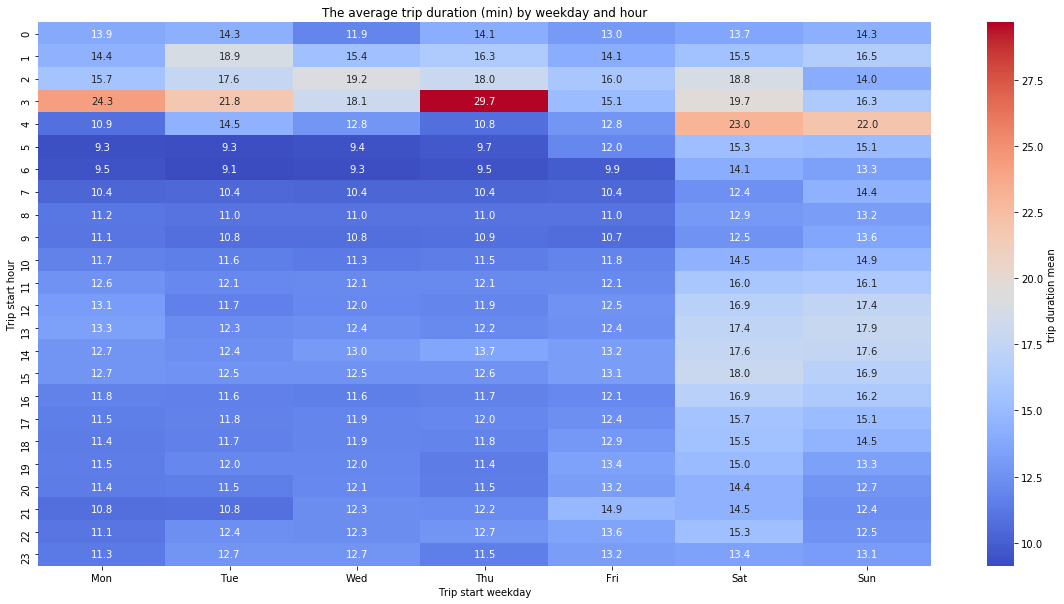

In [53]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

group = ford_gobike.groupby(['start_weekday', 'start_hour'])
df_new3 = pd.DataFrame(group.mean()['duration_min'])
df_new3 = df_new3.reset_index()
df_new3.start_weekday = pd.Categorical(df_new3.start_weekday, categories = weekdays, ordered=True)

pivot = df_new3.pivot_table(values='duration_min',index='start_hour',columns='start_weekday')
plt.figure(figsize=(20,10))
sb.heatmap(pivot, annot=True, fmt='.1f', cbar_kws = {'label' : 'trip duration mean'}, cmap='coolwarm')
plt.xlabel('Trip start weekday')
plt.ylabel('Trip start hour')
plt.title('The average trip duration (min) by weekday and hour')
plt.show();

> The heatmap plot shows interesting facts that the highest average trip duration is at night time. It suggests that users use bikes when there is no public transport operating. 
 
Next up, trip frequency base of different customers type, gender and age range.

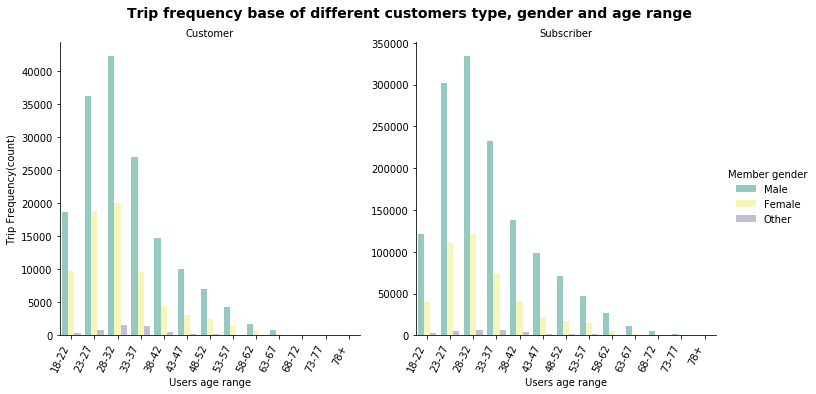

In [54]:
g = sb.catplot(data=ford_gobike, x='age_range', col='user_type', hue='member_gender', kind='count', sharey = False, palette="Set3")
g.set_xticklabels(rotation=65, horizontalalignment='right')
g.set_axis_labels('Users age range', 'Trip Frequency(count)')
g._legend.set_title('Member gender')
g.set_titles("{col_name}")
g.fig.suptitle('Trip frequency base of different customers type, gender and age range', y=1.03, fontsize=14, fontweight='semibold');

> From the plot above we can have a more detailed look at the Ford GoBikes users. Compered distribution of bike trips by customer and subscriber types  shows that the customer users are younger than subscribers users. Also the gender gaps are higher in subscriber type users. 

Next up, compare distance, duration and user type.

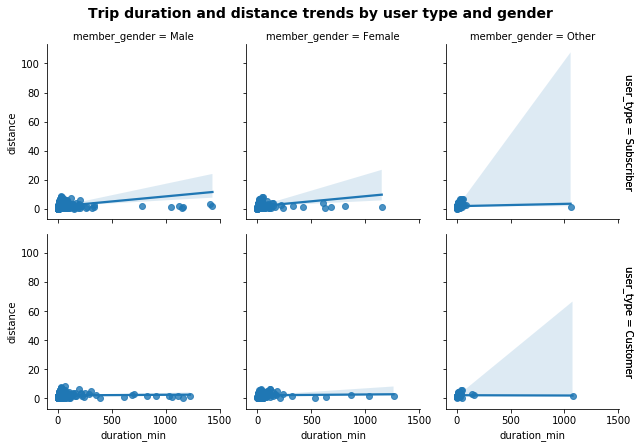

In [55]:
# compare distance, duration and user type
sample = ford_gobike.sample(25000)
g = sb.FacetGrid(data = sample, col = 'member_gender', row = 'user_type', margin_titles = True)
g.map(sb.regplot, 'duration_min', 'distance')
g.set_titles('{col_name}');
g.fig.suptitle('Trip duration and distance trends by user type and gender', y=1.03, fontsize=14, fontweight='semibold');

> The last plot shows the trend between duration (min) and distance (min) shows significant  differences between the user gender and users type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The trip duration mean distribution is higher on weekend days and on summer months. The highest average trip duration is 17.7 minutes in July month and on Saturdays.

- The trip duration mean distribution by day hour is highest at the night time. The highest average trip duration is 29.7 min at 3 am. on Thursdays.

- Compered distribution of bike trips by customer and subscriber types  shows that the customer users are younger than subscribers users. Also the gender gaps are higher in subscriber type users.

- The trends between duration  and distance  shows significant  differences between the user gender and users type.

### Were there any interesting or surprising interactions between features?

- The heatmap plot shows interesting facts that the highest average trip duration is at night time. It suggests that users use bikes when there is no public transport operating.


### List of resources

- Citi Bike 2017 Analysis - https://towardsdatascience.com/citi-bike-2017-analysis-efd298e6c22c
- Deriving the Haversine Formula - http://mathforum.org/library/drmath/view/51879.html
- Fast Haversine Approximation (Python/Pandas) - https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
- Rotating axis labels in matplotlib and seaborn - https://drawingfromdata.com/seaborn/matplotlib/visualization/2020/11/01/rotate-axis-labels-matplotlib-seaborn.html